In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

# LORENTZIAN
def lorentzian(log_tau, log_tau_1, w, A):
    return (A / np.pi) * (w / ((log_tau - log_tau_1)**2 + w**2))

# NLS integrand
def integrand(log_tau, t, log_tau_1, w, A, n):
    tau = 10**log_tau
    return (1 - np.exp(-(t / tau)**n)) * lorentzian(log_tau, log_tau_1, w, A)

#NLS directly taking rel.pol. as input
def NLS_model(t, log_tau_1, w, A, n):
    integral, _ = quad(lambda log_tau: integrand(log_tau, t, log_tau_1, w, A, n), -50, 50)
    return 2*integral

#vectorization
def NLS_model_vectorized(t, log_tau_1, w, A, n):
    fine_t = np.logspace(np.log10(t.min()), np.log10(t.max()), num=1000)
    return np.array([NLS_model(ti, log_tau_1, w, A, n) for ti in fine_t])

# read&extract
filepath = '/Users/oskarleibnitz/Desktop/PUND/Pre_polled PUND Data/ABS_BiFerro_CMOS_Ferroelectricchar_TXT2/width_vs_pp_3Vpre.txt'
data = pd.read_csv(filepath, sep='\s+', header=0).iloc[:7]

time_data = data.iloc[:, 0].values  # c1: 'time (pulsewidth)'
fraction_polarized_data = data.iloc[:, 2].values  # c3: 'rel.pol'

# initial guesses and bounds for log_tau_1, w, A, n
initial_guess = [-3, 0.5, 1, 2.5]  
bounds = ([-10, 0.000001, 0, 1], [0, 0.9, 10, 3])  

#fitting
popt, pcov = curve_fit(lambda t, log_tau_1, w, A, n: NLS_model_vectorized(t, log_tau_1, w, A, n),
                       time_data, fraction_polarized_data, p0=initial_guess, bounds=bounds)
log_tau_1_fit, w_fit, A_fit, n_fit = popt

fitted_data = NLS_model_vectorized(time_data, log_tau_1_fit, w_fit, A_fit, n_fit)

#plotting
plt.figure()
plt.plot(time_data, fraction_polarized_data, 'o', label='Experimental Data 3V')
plt.plot(time_data, fitted_data, '-', label=f'Fitted NLS Model\n$\\log(\\tau_1)$={log_tau_1_fit:.2f}, $w$={w_fit:.5f}, $A$={A_fit:.2f}, $n$={n_fit:.2f}')
plt.xscale('log')
plt.xlabel('Time (s)')
plt.axvline(x=10**log_tau_1_fit, color='r', linestyle='--', label='avg. switching time')
plt.ylabel('Fraction Polarized')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (1000,) (7,) 

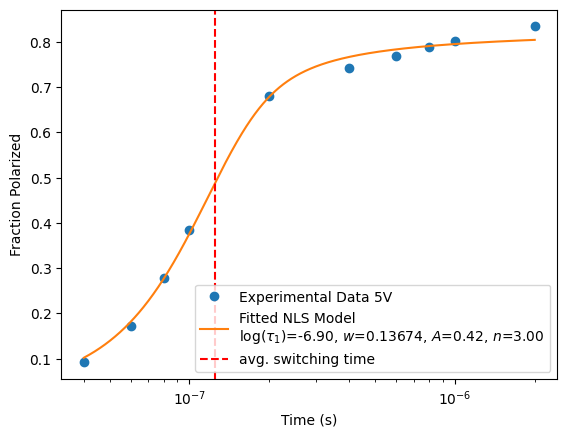

1.2494060273277595e-07


In [15]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

# LORENTZIAN
def lorentzian(log_tau, log_tau_1, w, A):
    return (A / np.pi) * (w / ((log_tau - log_tau_1)**2 + w**2))

# NLS integrand
def integrand(log_tau, t, log_tau_1, w, A, n):
    tau = 10**log_tau
    return (1 - np.exp(-(t / tau)**n)) * lorentzian(log_tau, log_tau_1, w, A)

# NLS directly taking rel.pol. as input
def NLS_model(t, log_tau_1, w, A, n):
    integral, _ = quad(lambda log_tau: integrand(log_tau, t, log_tau_1, w, A, n), -10, 10, epsabs=1.49e-8, epsrel=1.49e-8)
    return 2 * integral

# Vectorization with original grid
def NLS_model_vectorized(t, log_tau_1, w, A, n):
    return np.array([NLS_model(ti, log_tau_1, w, A, n) for ti in t])

# Read and extract data, only first 10 lines
filepath = '/Users/oskarleibnitz/Desktop/PUND/Pre_polled PUND Data/ABS_BiFerro_CMOS_Ferroelectricchar_TXT2/width_vs_pp_2p5Vpre.txt'
data = pd.read_csv(filepath, sep='\s+', header=0).iloc[:10]

time_data = data.iloc[:, 0].values  # c1: 'time (pulsewidth)'
fraction_polarized_data = data.iloc[:, 2].values  # c3: 'rel.pol'

# Initial guesses and bounds for log_tau_1, w, A, n
initial_guess = [-7.04, 0.5, 0.49, 1]
bounds = ([-10, 0.00000000001, 0, 0], [0, 0.9, 10, 3])

# Fitting
popt, pcov = curve_fit(lambda t, log_tau_1, w, A, n: NLS_model_vectorized(t, log_tau_1, w, A, n),
                       time_data, fraction_polarized_data, p0=initial_guess, bounds=bounds)
log_tau_1_fit, w_fit, A_fit, n_fit = popt

# Use a finer grid for plotting
fine_time_data = np.logspace(np.log10(time_data.min()), np.log10(time_data.max()), num=1000)
fitted_fine_data = NLS_model_vectorized(fine_time_data, log_tau_1_fit, w_fit, A_fit, n_fit)

# Plotting
plt.figure()
plt.plot(time_data, fraction_polarized_data, 'o', label='Experimental Data 5V')
plt.plot(fine_time_data, fitted_fine_data, '-', label=f'Fitted NLS Model\n$\\log(\\tau_1)$={log_tau_1_fit:.2f}, $w$={w_fit:.5f}, $A$={A_fit:.2f}, $n$={n_fit:.2f}')
plt.xscale('log')
plt.xlabel('Time (s)')
plt.axvline(x=10**log_tau_1_fit, color='r', linestyle='--', label='avg. switching time')
plt.ylabel('Fraction Polarized')
plt.legend()
plt.show()
print(10**log_tau_1_fit)

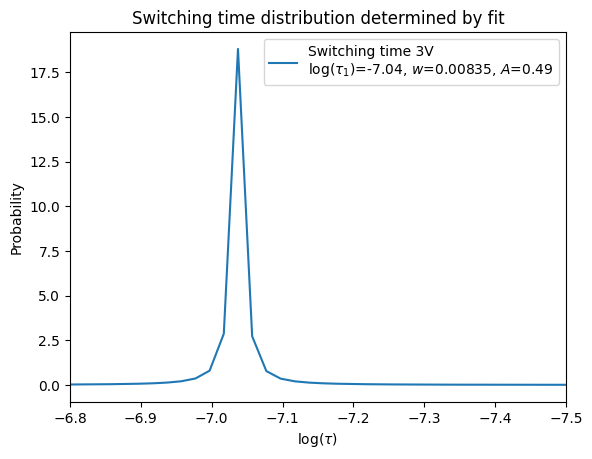

In [107]:
# Generate data points for the Lorentzian plot
log_tau_values = np.linspace(-10, 10, 1000)
lorentzian_values = lorentzian(log_tau_values, log_tau_1_fit, w_fit, A_fit)

# Plotting the Lorentzian function
plt.figure()
plt.plot(log_tau_values, lorentzian_values, label=f'Switching time 3V\n$\\log(\\tau_1)$={log_tau_1_fit:.2f}, $w$={w_fit:.5f}, $A$={A_fit:.2f}')
plt.xlabel('$\\log(\\tau)$')
plt.ylabel('Probability')
plt.xlim(-6.8, -7.5)
plt.title('Switching time distribution determined by fit')
plt.legend()
plt.show()


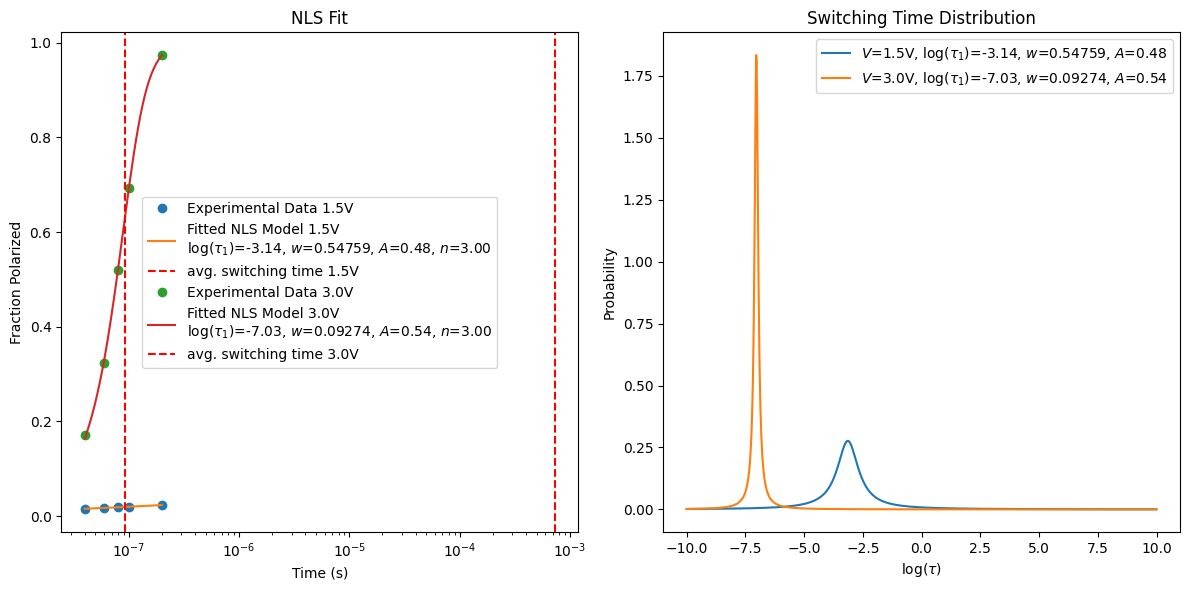

In [98]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
import pandas as pd

# Define the Lorentzian function
def lorentzian(log_tau, log_tau_1, w, A):
    return (A / np.pi) * (w / ((log_tau - log_tau_1)**2 + w**2))

# Define the NLS integrand function
def integrand(log_tau, t, log_tau_1, w, A, n):
    tau = 10**log_tau
    return (1 - np.exp(-(t / tau)**n)) * lorentzian(log_tau, log_tau_1, w, A)

# Define the NLS model function
def NLS_model(t, log_tau_1, w, A, n):
    integral, _ = quad(lambda log_tau: integrand(log_tau, t, log_tau_1, w, A, n), -10, 10, epsabs=1.49e-8, epsrel=1.49e-8)
    return 2 * integral

# Vectorized version of the NLS model
def NLS_model_vectorized(t, log_tau_1, w, A, n):
    return np.array([NLS_model(ti, log_tau_1, w, A, n) for ti in t])

# Function to fit the model
def fit_nls_model(filepath, initial_guess, bounds):
    data = pd.read_csv(filepath, sep='\s+', header=0).iloc[:5]
    time_data = data.iloc[:, 0].values
    fraction_polarized_data = data.iloc[:, 2].values
    popt, _ = curve_fit(lambda t, log_tau_1, w, A, n: NLS_model_vectorized(t, log_tau_1, w, A, n),
                        time_data, fraction_polarized_data, p0=initial_guess, bounds=bounds)
    log_tau_1_fit, w_fit, A_fit, n_fit = popt
    return log_tau_1_fit, w_fit, A_fit, n_fit, time_data, fraction_polarized_data

# List of file paths and corresponding voltages
filepaths = [
    ('/Users/oskarleibnitz/Desktop/PUND/Pre_polled PUND Data/ABS_BiFerro_CMOS_Ferroelectricchar_TXT2/width_vs_pp_1p5Vpre.txt', 1.5),
    ('/Users/oskarleibnitz/Desktop/PUND/Pre_polled PUND Data/ABS_BiFerro_CMOS_Ferroelectricchar_TXT2/width_vs_pp_3Vpre.txt', 3.0)
]

# Initial guesses and bounds for the fit
initial_guess = [-3, 0.5, 1, 2.5]
bounds = ([-10, 0.000001, 0, 1], [0, 0.9, 10, 3])

# Storage for fitted parameters and data
fit_storage = {}

# Perform the fits and store the results
for filepath, V in filepaths:
    log_tau_1_fit, w_fit, A_fit, n_fit, time_data, fraction_polarized_data = fit_nls_model(filepath, initial_guess, bounds)
    fit_storage[V] = {
        'params': (log_tau_1_fit, w_fit, A_fit, n_fit),
        'time_data': time_data,
        'fraction_polarized_data': fraction_polarized_data
    }

# Generate data points for the Lorentzian plot
log_tau_values = np.linspace(-10, 10, 1000)

# Plotting the Lorentzian functions and NLS fits for all stored voltages
plt.figure(figsize=(12, 6))

# Plot NLS fits
plt.subplot(1, 2, 1)
for voltage, data in fit_storage.items():
    params = data['params']
    log_tau_1, w, A, n = params
    fine_time_data = np.logspace(np.log10(data['time_data'].min()), np.log10(data['time_data'].max()), num=1000)
    fitted_fine_data = NLS_model_vectorized(fine_time_data, log_tau_1, w, A, n)
    plt.plot(data['time_data'], data['fraction_polarized_data'], 'o', label=f'Experimental Data {voltage}V')
    plt.plot(fine_time_data, fitted_fine_data, '-', label=f'Fitted NLS Model {voltage}V\n$\\log(\\tau_1)$={log_tau_1:.2f}, $w$={w:.5f}, $A$={A:.2f}, $n$={n:.2f}')
    plt.axvline(x=10**log_tau_1, color='r', linestyle='--', label=f'avg. switching time {voltage}V')
plt.xscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Fraction Polarized')
plt.title('NLS Fit')
plt.legend()

# Plot Lorentzian functions
plt.subplot(1, 2, 2)
for voltage, data in fit_storage.items():
    params = data['params']
    log_tau_1, w, A, _ = params
    lorentzian_values = lorentzian(log_tau_values, log_tau_1, w, A)
    plt.plot(log_tau_values, lorentzian_values, label=f'$V$={voltage}V, $\\log(\\tau_1)$={log_tau_1:.2f}, $w$={w:.5f}, $A$={A:.2f}')
plt.xlabel('$\\log(\\tau)$')
plt.ylabel('Probability')
plt.title('Switching Time Distribution')
plt.legend()

plt.tight_layout()
plt.show()
